# Project : Air Bnb New York 

> - Data cleaning (removing outlier, change format
> - Data analyst
> - Data Visualisation

<span style="color: rgb(201, 209, 217); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px; background-color: rgb(13, 17, 23);">Use this air bnb new york city&nbsp;</span> [data set](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/data) <span style="color: rgb(201, 209, 217); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px; background-color: rgb(13, 17, 23);">&nbsp;and remove outliers using percentile based on price per night for a given apartment/home. You can use suitable upper and lower limits on percentile based on your intuition. Your goal is to come up with new pandas dataframe that doesn't have the outliers present in it.</span>

In [83]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn  

In [ ]:
df = pd.read_csv(r'E:\Portofolio\Sql Project 4\Data\AB_NYC_2019.csv')
df.head(10)

In [10]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

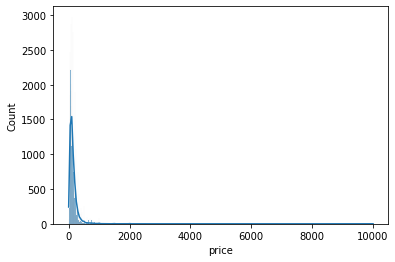

<AxesSubplot:xlabel='price', ylabel='Count'>

In [77]:
sn.histplot(df.price, kde=True)

## Remove outlier using percentile

In [82]:
lower,upper = df.price.quantile([0.1,0.9]) ## using percentile to define boundary of outlier min 10% and max 90%
lower,upper 

(49.0, 269.0)

In [66]:
df_out = df[(df.price<lower) | (df.price>upper)] ## Outlier
df_out.shape, df.shape

((9560, 16), (48895, 16))

In [65]:
df2 = df[(df.price>lower) & (df.price<upper)] ## New table no outlier
df2.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11542,8984018,Quaint 1BR In West Village,3256202,Kyle,Manhattan,Chelsea,40.74044,-74.00326,Entire home/apt,225,1,0,NaN,NaN,1,0
18153,14213699,"West 50th street, Lux 1bd Serviced Apartment*",22541573,Ken,Manhattan,Hell's Kitchen,40.76297,-73.98588,Entire home/apt,215,30,1,2017-12-02,0.05,87,357
24759,19877706,Big 3 Bedroom Garden Level Apartment Near Subway,2988712,Sasha,Bronx,Claremont Village,40.83507,-73.91040,Entire home/apt,72,90,2,2018-04-23,0.12,7,223
25813,20651136,"Private 1 bed 1 bath- Chelsea, Manhattan",44170535,Caitlin,Manhattan,Chelsea,40.74590,-73.99867,Private room,165,3,4,2017-10-10,0.18,2,0
27690,21750219,Luxury 2 Bed / 2 Bath Apt 3 Blocks to Central ...,114008316,Artemisia,Manhattan,East Harlem,40.78951,-73.94605,Entire home/apt,195,30,5,2019-04-12,0.30,1,282
14427,11317209,Modern Apartment in Williamsburg,20527254,Eddy,Brooklyn,Williamsburg,40.70821,-73.94719,Private room,65,2,9,2016-12-05,0.25,1,0
2424,1203812,Quiet minimal clean,6575712,Emma,Manhattan,East Village,40.73138,-73.98807,Entire home/apt,125,2,28,2019-05-20,0.45,1,179
44365,34200086,Cozy Studio with Patio Close to the Subway,258202599,Elijah,Manhattan,East Harlem,40.78967,-73.94199,Entire home/apt,145,2,7,2019-06-24,3.62,1,0
47433,35732847,A lovely room in a great house close to RUMC.,102263916,John,Staten Island,Tompkinsville,40.63281,-74.09132,Private room,50,1,4,2019-07-07,4.00,2,84
47000,35539920,#1 Hotel-Like Private Room King Bed Near JFK,263504959,David,Queens,Woodhaven,40.69158,-73.86578,Private room,50,1,6,2019-07-06,6.00,8,273


In [70]:
df2.price.describe()

count    38957.00000
mean       121.60708
std         55.45717
min         50.00000
25%         75.00000
50%        107.00000
75%        155.00000
max        268.00000
Name: price, dtype: float64

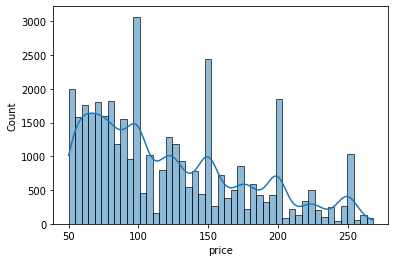

<AxesSubplot:xlabel='price', ylabel='Count'>

In [72]:
sn.histplot(df2.price, kde=True)

## Find missing value on new dataframe

In [94]:
df2.shape, df2.isnull().sum(), df2.duplicated().sum()

((38957, 16),
 id                                   0
 name                                12
 host_id                              0
 host_name                           17
 neighbourhood_group                  0
 neighbourhood                        0
 latitude                             0
 longitude                            0
 room_type                            0
 price                                0
 minimum_nights                       0
 number_of_reviews                    0
 last_review                       7400
 reviews_per_month                 7400
 calculated_host_listings_count       0
 availability_365                     0
 dtype: int64,
 0)

In [85]:
df3 = df2.dropna()

In [92]:
df3.shape, df3.isnull().sum(), df3.duplicated().sum()

((31538, 16),
 id                                0
 name                              0
 host_id                           0
 host_name                         0
 neighbourhood_group               0
 neighbourhood                     0
 latitude                          0
 longitude                         0
 room_type                         0
 price                             0
 minimum_nights                    0
 number_of_reviews                 0
 last_review                       0
 reviews_per_month                 0
 calculated_host_listings_count    0
 availability_365                  0
 dtype: int64,
 0)